# 02_iris_quickstart — Iris 첫 모델 & 모델 교체

목표
- 데이터를 학습/시험용으로 나누는 이유를 이해
- 첫 모델(DecisionTree)로 학습 → 예측 → 정확도를 계산
- 같은 절차로 LogisticRegression, KNN으로 교체
- 간단한 파라미터 변경으로 성능 차이를 직접 확인

In [8]:
import sklearn
print(sklearn.__version__)

1.7.2


In [2]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


### 왜 Iris 데이터일까?
- 꽃받침(sepal), 꽃잎(petal)의 길이·너비 **4개의 수치만** 보고도 품종을 맞출 수 있을까?
- 마치 '신발 사이즈와 키'만 보고도 남/녀를 구별하는 느낌과 비슷합니다.
- 머신러닝 교재에서 Hello World로 쓰이는 이유:
  - 데이터가 작고 단순하다 (150개 샘플, 3개 클래스)
  - 바로 시각화해도 직관적으로 보임

In [20]:
import pandas as pd

iris = load_iris()
iris
iris
iris_data = iris.data
# iris_data

iris_label = iris.target
# iris_label
# print('iris target값:', iris_label)
# print('iris target명:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


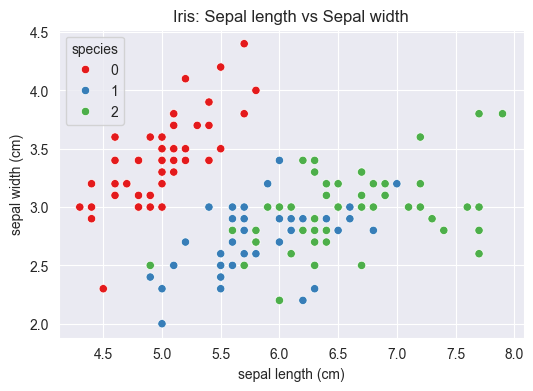

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["species"] = y

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=iris_df,
    x="sepal length (cm)", y="sepal width (cm)",
    hue="species", palette="Set1"
)
plt.title("Iris: Sepal length vs Sepal width")
plt.show()

## Train/Test 분리
같은 데이터로 공부하고 시험 보면 성적이 부풀어진다.
처음 보는 데이터(Test)로 성능을 확인해야 한다.

In [5]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (120, 4) (120,)
Test : (30, 4) (30,)


## 첫 모델: DecisionTree 분류기
scikit-learn 모델은 모두 같은 패턴으로 쓴다.
- fit(학습), predict(예측), 평가(점수/지표)

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"DecisionTree Accuracy: {acc_dt:.3f}")

DecisionTree Accuracy: 0.933


## 정확도(Accuracy) 해석
정확도 = (맞춘 개수) / (전체 개수)
직관적이지만, 데이터가 불균형하면 착시가 생길 수 있음

## 모델 교체
같은 절차로 LogisticRegression, KNN 모델도 실행해 본다.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

RANDOM_STATE = 42

# Logistic Regression
lr = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)
lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_test, lr.predict(X_test))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc_knn = accuracy_score(y_test, knn.predict(X_test))

pd.DataFrame({
    "model": ["DecisionTree", "LogisticRegression", "KNN(k=5)"],
    "param": ["default", "max_iter=2000", "n_neighbors=5"],
    "accuracy": [acc_dt, acc_lr, acc_knn]
}).sort_values("accuracy", ascending=False).reset_index(drop=True)

,model,param,accuracy
0,KNN(k=5),n_neighbors=5,1.000000
1,LogisticRegression,max_iter=2000,0.966667
2,DecisionTree,default,0.933333


## 실습 미션 (구체)

1) DecisionTree에서 `max_depth`를 2, 3, None으로 각각 바꿔 실행하세요.
   - 정확도를 기록하고, 어떤 깊이가 가장 좋은지 한 줄 코멘트 작성

2) KNN에서 `n_neighbors`를 3, 5, 9로 각각 실행하세요.
   - 정확도를 기록하고, 어떤 k가 가장 좋은지 한 줄 코멘트 작성

3) 아래 표에 결과를 정리하세요. (빈칸 채우기)

| model        | param          | accuracy | 코멘트 |
|--------------|----------------|----------|---------|
| DecisionTree | max_depth=2    |          |         |
| DecisionTree | max_depth=3    |          |         |
| DecisionTree | max_depth=None |          |         |
| KNN          | n_neighbors=3  |          |         |
| KNN          | n_neighbors=5  |          |         |
| KNN          | n_neighbors=9  |          |         |